In [1]:
# Import Library
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')
import cv2

In [2]:
train_file = pd.read_csv('E:/Bhagath/DBeginner/DBeginner/meta-data/meta-data/train.csv')

In [3]:
train_file.shape

(7245, 2)

In [4]:
train_file['Animal'].unique()

array(['hippopotamus', 'squirrel', 'grizzly+bear', 'ox',
       'german+shepherd', 'buffalo', 'otter', 'bobcat', 'wolf',
       'persian+cat', 'collie', 'antelope', 'seal', 'dalmatian',
       'siamese+cat', 'moose', 'horse', 'killer+whale', 'mouse', 'walrus',
       'beaver', 'rhinoceros', 'weasel', 'chimpanzee', 'raccoon', 'rat',
       'chihuahua', 'spider+monkey', 'mole', 'bat'], dtype=object)

In [5]:
train_file['y'] =[0 if x in ['hippopotamus']
                    else 1 if x in ['squirrel']
                    else 2 if x in ['grizzly+bear']
                    else 3 if x in ['ox']
                  else 4 if x in ['german+shepherd']
                  else 5 if x in ['buffalo']
                  else 6 if x in ['otter']
                  else 7 if x in ['bobcat']
                  else 8 if x in ['wolf']
                  else 9 if x in ['persian+cat']
                  else 10 if x in ['collie']
                  else 11 if x in ['antelope']
                  else 12 if x in ['seal']
                  else 13 if x in ['dalmatian']
                  else 14 if x in ['siamese+cat']
                  else 15 if x in ['moose']
                  else 16 if x in ['horse']
                  else 17 if x in ['killer+whale']
                  else 18 if x in ['mouse']
                  else 19 if x in ['walrus']
                  else 20 if x in ['beaver']
                  else 21 if x in ['rhinoceros']
                  else 22 if x in ['chimpanzee']
                  else 23 if x in ['weasel']
                  else 24 if x in ['spider+monkey']
                  else 25 if x in ['raccoon']
                  else 26 if x in ['rat']
                  else 27 if x in ['chihuahua']
                  else 28 if x in ['mole']
                  else 29 for x in train_file['Animal']]

In [6]:
train_file.y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 23, 22, 25, 26, 27, 24, 28, 29], dtype=int64)

In [7]:
#Image loc train : C:\Users\bhagathbabu.bellagan\Downloads\DBeginner\DBeginner\train\train
#Image loc test : C:\Users\bhagathbabu.bellagan\Downloads\DBeginner\DBeginner\test\test
#C:\Users\bhagathbabu.bellagan\Downloads\DBeginner\DBeginner\meta-data\meta-data

In [8]:
test_file = pd.read_csv('E:/Bhagath/DBeginner/DBeginner/meta-data/meta-data/test.csv')

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_file, train_file['y'], test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4854, 3), (2391, 3), (4854,), (2391,))

In [25]:
train_images = []
train_labels = []
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from skimage.io import imread
data = X_train.values
for ix in range(data.shape[0]):
    img = imread('E:/Bhagath/DBeginner/DBeginner/all_images/'+ data[ix][0])
    resized_image = cv2.resize(img, (50, 50))
    gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    gray_image = np.array(gray_image)
    train_images.append(gray_image)
    train_labels.append(data[ix][2])

In [53]:
test_images = []
test_labels = []
data_test = X_test.values
for ix in range(data_test.shape[0]):
    img_tst = imread('E:/Bhagath/DBeginner/DBeginner/all_images/'+ data_test[ix][0])
    resized_imgs_tst = cv2.resize(img_tst, (50, 50))
    gray_image_tst = cv2.cvtColor(resized_imgs_tst, cv2.COLOR_BGR2GRAY)
    gray_image_tst = np.array(gray_image_tst)
    test_images.append(gray_image_tst)
    test_labels.append(data_test[ix][2])

In [27]:
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels)
test_images = np.asarray(test_images)
test_labels = np.asarray(test_labels)

In [28]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((4854, 400, 400), (4854,), (2391, 400, 400), (2391,))

Training data shape :  (4854, 400, 400) (4854,)
Testing data shape :  (2391, 400, 400) (2391,)
Total number of outputs :  30
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


Text(0.5,1,'Ground Truth : 29')

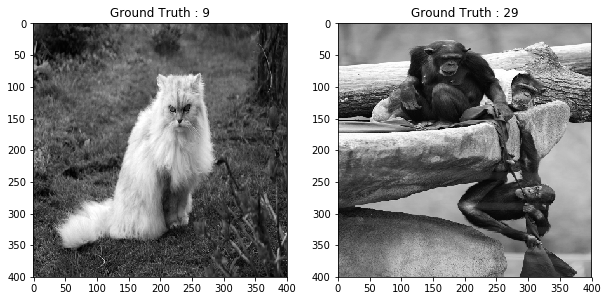

In [29]:
from keras.utils import to_categorical
 
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)
 
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[38], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[20], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [30]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [31]:
train_data.shape, test_data.shape

((4854, 160000), (2391, 160000))

In [34]:
test_data.max()

255

In [35]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
 
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [55]:
train_data

array([[0.4862745 , 0.4862745 , 0.49803922, ..., 0.4392157 , 0.43529412,
        0.43137255],
       [0.42352942, 0.46666667, 0.49019608, ..., 0.5176471 , 0.5019608 ,
        0.46666667],
       [0.46666667, 0.41960785, 0.4509804 , ..., 0.5058824 , 0.41960785,
        0.39607844],
       ...,
       [0.37254903, 0.32941177, 0.38039216, ..., 0.7764706 , 0.78431374,
        0.69803923],
       [0.30980393, 0.33333334, 0.34901962, ..., 0.31764707, 0.3254902 ,
        0.32941177],
       [0.41960785, 0.3647059 , 0.42352942, ..., 0.54509807, 0.4392157 ,
        0.4862745 ]], dtype=float32)

In [36]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[1])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[1])

Original label 0 :  10
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [37]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

In [38]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 4854 samples, validate on 2391 samples
Epoch 1/10
4854/4854 [==============================] - 255s 53ms/step - loss: 14.1439 - acc: 0.0849 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 2/10
4854/4854 [==============================] - 119s 25ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 3/10
4854/4854 [==============================] - 148s 31ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 4/10
4854/4854 [==============================] - 112s 23ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 5/10
4854/4854 [==============================] - 121s 25ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 6/10
4854/4854 [==============================] - 124s 26ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 7/10
4854/4854 [==============================] - 102s 21ms/step - loss: 14.6969 - acc: 0.0882 - val_loss: 14.78

In [40]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

2391/2391 [==============================] - 15s 6ms/step
Evaluation result on Test Data : Loss = 14.783346961502847, accuracy = 0.08281053953100229


Text(0.5,1,'Accuracy Curves')

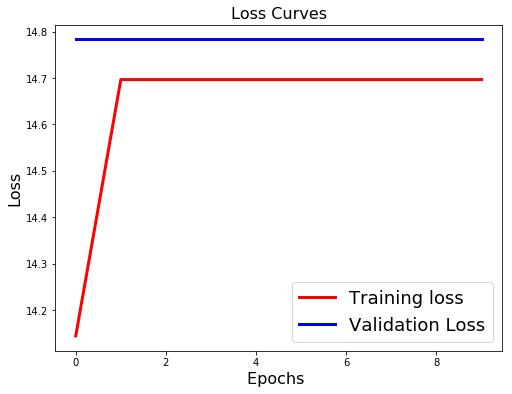

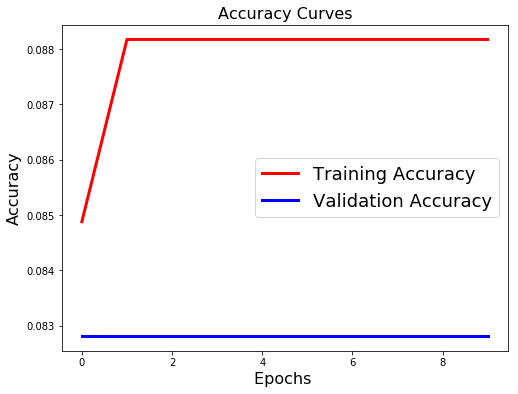

In [41]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [42]:
from keras.layers import Dropout
 
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Train on 4854 samples, validate on 2391 samples
Epoch 1/20
4854/4854 [==============================] - 239s 49ms/step - loss: 14.6447 - acc: 0.0527 - val_loss: 14.7834 - val_acc: 0.0828
Epoch 2/20
4854/4854 [==============================] - 196s 40ms/step - loss: 15.1234 - acc: 0.0602 - val_loss: 15.2957 - val_acc: 0.0510
Epoch 3/20
4854/4854 [==============================] - 149s 31ms/step - loss: 15.2918 - acc: 0.0511 - val_loss: 15.2957 - val_acc: 0.0510
Epoch 4/20
4854/4854 [==============================] - 113s 23ms/step - loss: 15.2846 - acc: 0.0517 - val_loss: 15.2957 - val_acc: 0.0510
Epoch 5/20
4854/4854 [==============================] - 96s 20ms/step - loss: 15.2846 - acc: 0.0517 - val_loss: 15.2957 - val_acc: 0.0510
Epoch 6/20
4854/4854 [==============================] - 101s 21ms/step - loss: 15.2846 - acc: 0.0517 - val_loss: 15.2957 - val_acc: 0.0510
Epoch 7/20
4854/4854 [==============================] - 103s 21ms/step - loss: 15.2846 - acc: 0.0517 - val_loss: 15.295

Text(0.5,1,'Accuracy Curves')

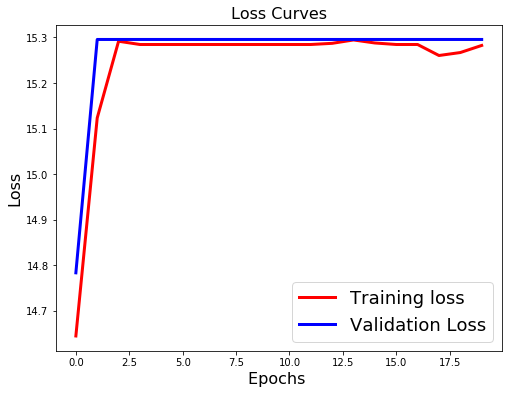

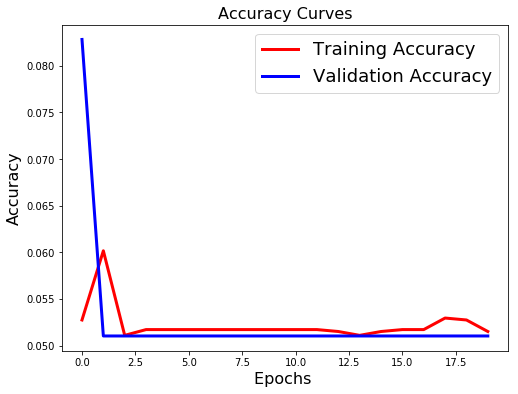

In [43]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))
 
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [45]:
pred = model_reg.predict_classes(test_data[[0],:])

In [46]:
pred

array([4], dtype=int64)

In [47]:
model_reg

In [48]:
# Predict the probabilities for each class 
res = []
for i in range(len(test_data)):
    pred = model_reg.predict(test_data[[i],:])
    res.append(pred)

In [49]:
pred.shape

(1, 30)

In [50]:
res

[array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       dtype=float32),
 array([[0., 0., 0., 0

In [51]:
len(res)

2391

In [ ]:
df = pd.DataFrame(columns=['0','1','2','3','4','5','6','7','8','9','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29'])
for i in range(len(res)):
    df[i] = res[i]


#df = pd.DataFrame({'R':px2[:,0],'G':px2[:,1],'B':px2[:,2]})